In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv('/content/Crime_Data_Clean.csv')

## **STATISTIKA DESKRIPTIF**

In [ ]:
df.select_dtypes(include='number').describe().T.assign(
    mode=df.select_dtypes(include='number').mode().iloc[0],
    var=df.select_dtypes(include='number').var(),
    IQR=lambda x: x['75%'] - x['25%'],
    range=lambda x: x['max'] - x['min']
)[['mean', '50%', 'mode', 'var', 'std', 'IQR', 'range']]


,mean,50%,mode,var,std,IQR,range
dr_no,2.100715e+08,2.108058e+08,817.0000,6.469852e+13,8.043539e+06,1.061046e+07,2.520034e+08
area,1.076947e+01,1.100000e+01,12.0000,3.694749e+01,6.078444e+00,1.000000e+01,2.000000e+01
rpt_dist_no,1.123243e+03,1.145000e+03,162.0000,3.694796e+05,6.078484e+02,9.950000e+02,2.098000e+03
part_1-2,1.416212e+00,1.000000e+00,1.0000,2.429800e-01,4.929300e-01,1.000000e+00,1.000000e+00
crm_cd,5.024912e+02,4.420000e+02,510.0000,4.349985e+04,2.085662e+02,2.960000e+02,8.460000e+02
vict_age,3.006094e+01,3.100000e+01,0.0000,4.700417e+02,2.168045e+01,3.200000e+01,1.240000e+02
premis_cd,3.023290e+02,2.030000e+02,101.0000,4.652247e+04,2.156907e+02,4.000000e+02,8.700000e+02
weapon_used_cd,3.620855e+02,4.000000e+02,400.0000,1.525324e+04,1.235040e+02,9.200000e+01,4.150000e+02
crm_cd_1,5.022202e+02,4.420000e+02,510.0000,4.341079e+04,2.083526e+02,2.960000e+02,8.460000e+02
crm_cd_2,9.540787e+02,9.980000e+02,998.0000,1.342816e+04,1.158799e+02,0.000000e+00,7.890000e+02


**FUNGSI BANTU ECDF**

In [ ]:
def ecdf(data):
    """Hitung Empirical Cumulative Distribution Function (ECDF)."""
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, n+1) / n
    return x, y

np.random.seed(42)

### DISTRIBUSI :

#### 1. NORMALITAS

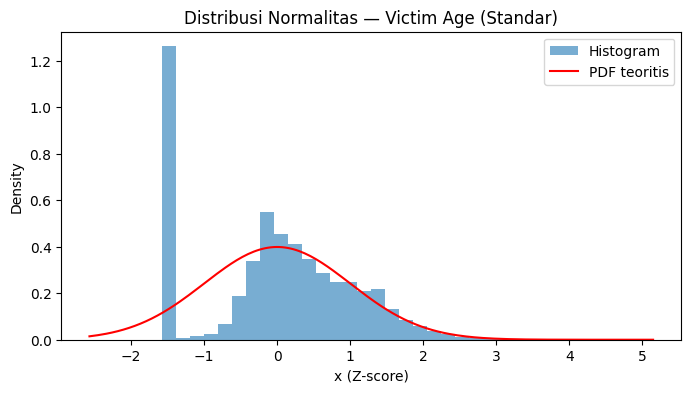

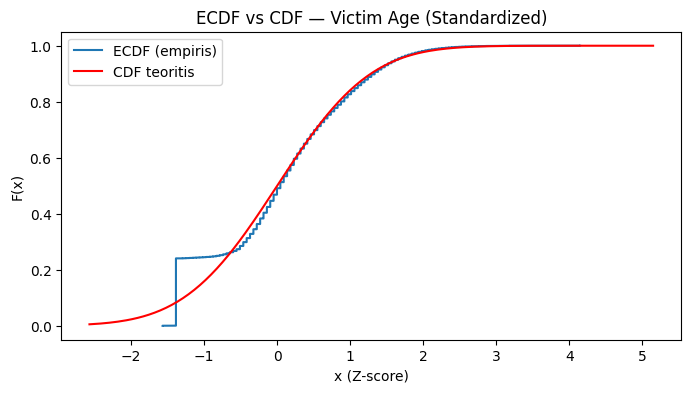

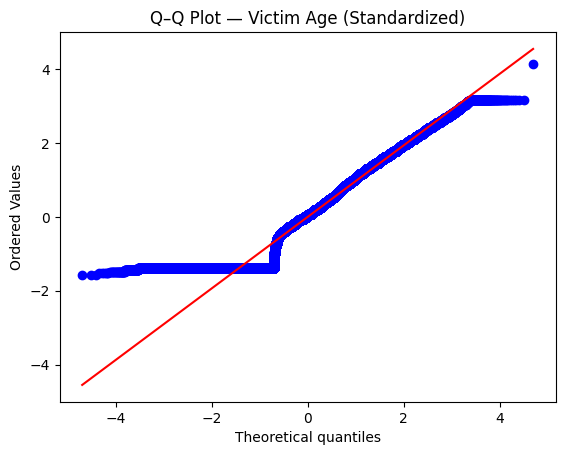

In [ ]:
# Ambil Data
data = df["vict_age"].dropna().astype(float)

# Standarisasi Data ke N(0,1)
data_std = (data - np.mean(data)) / np.std(data)

# Histogram + PDF teoritis
plt.figure(figsize=(8,4))
plt.hist(data_std, bins=30, density=True, alpha=0.6, label="Histogram")
xs = np.linspace(data_std.min()-1, data_std.max()+1, 200)
plt.plot(xs, stats.norm.pdf(xs, 0, 1), 'r-', label="PDF teoritis")
plt.title("Distribusi Normalitas — Victim Age (Standar)")
plt.xlabel("x (Z-score)")
plt.ylabel("Density")
plt.legend()
plt.show()

# ECDF vs CDF
x_ecdf, y_ecdf = ecdf(data_std)
plt.figure(figsize=(8,4))
plt.step(x_ecdf, y_ecdf, where='post', label='ECDF (empiris)')
plt.plot(xs, stats.norm.cdf(xs, 0, 1), 'r-', label='CDF teoritis')
plt.title("ECDF vs CDF — Victim Age (Standardized)")
plt.xlabel("x (Z-score)")
plt.ylabel("F(x)")
plt.legend()
plt.show()

# Q–Q Plot
stats.probplot(data_std, dist="norm", plot=plt)
plt.title("Q–Q Plot — Victim Age (Standardized)")
plt.show()

#### 2. UNIFORM

In [ ]:
# Cek nama kolom asli di dataset
print(df.columns.tolist())


['dr_no', 'date_rptd', 'area', 'area_name', 'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis', 'weapon_used_cd', 'weapon', 'status', 'status.1', 'crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat', 'lon', 'year_occ', 'district', 'date_time_occ', 'vict_age_bin']


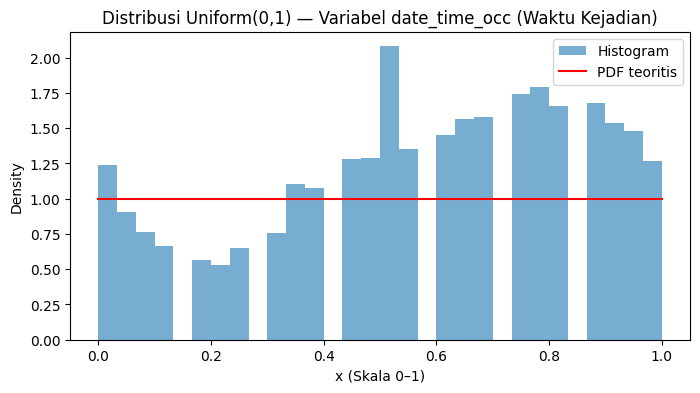

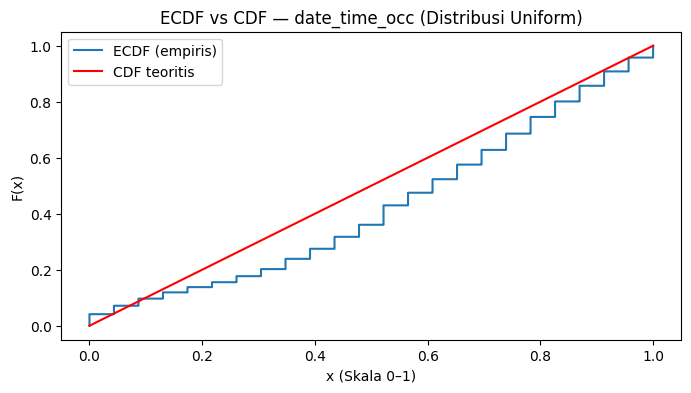

In [ ]:
# Data yang digunakan
data = pd.to_datetime(df["date_time_occ"], errors='coerce').dt.hour.dropna()

# Normalisasi ke skala 0–1 (wajib untuk uji Uniform(0,1))
uniform_sample = (data - np.min(data)) / (np.max(data) - np.min(data))

# Histogram + PDF teoritis
plt.figure(figsize=(8,4))
plt.hist(uniform_sample, bins=30, density=True, alpha=0.6, label="Histogram")
xs = np.linspace(0, 1, 200)
plt.plot(xs, stats.uniform.pdf(xs, 0, 1), 'r-', label="PDF teoritis")
plt.title("Distribusi Uniform(0,1) — Variabel date_time_occ (Waktu Kejadian)")
plt.xlabel("x (Skala 0–1)")
plt.ylabel("Density")
plt.legend()
plt.show()

# ECDF vs CDF
x_ecdf, y_ecdf = ecdf(uniform_sample)
plt.figure(figsize=(8,4))
plt.step(x_ecdf, y_ecdf, where='post', label='ECDF (empiris)')
plt.plot(xs, stats.uniform.cdf(xs, 0, 1), 'r-', label='CDF teoritis')
plt.title("ECDF vs CDF — date_time_occ (Distribusi Uniform)")
plt.xlabel("x (Skala 0–1)")
plt.ylabel("F(x)")
plt.legend()
plt.show()

#### 3. EKSPONENSIAL

Tipe data: int64
Nilai unik (contoh): [ 8 18 12 13 14  9  0 15  5 23]


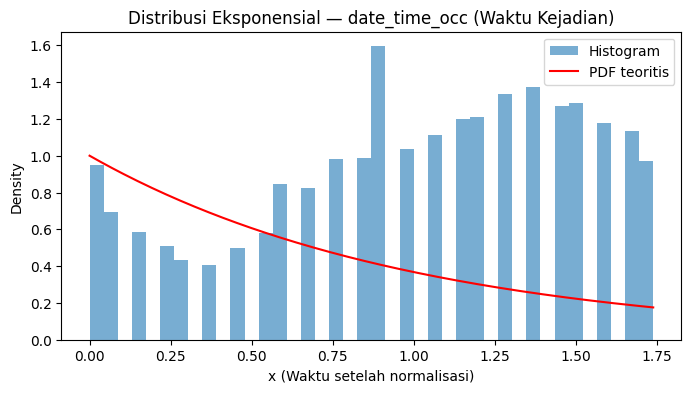

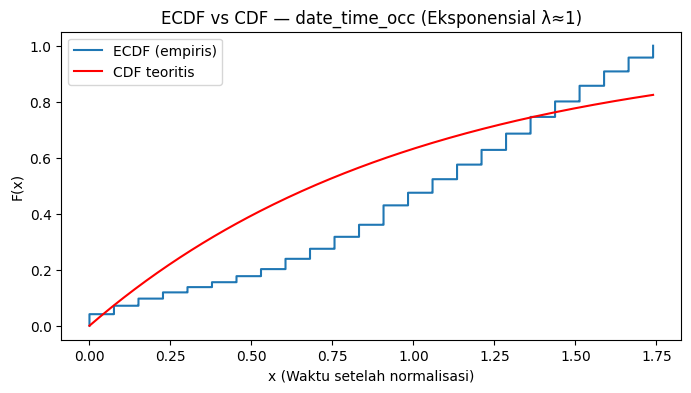

In [ ]:
# Konversi kolom datetime dan ambil jam (0–23)
data = pd.to_datetime(df["date_time_occ"], errors='coerce').dt.hour

# Buang nilai yang gagal dikonversi (NaN)
data = data.dropna().astype(int)

# Pastikan semuanya numerik
print("Tipe data:", data.dtype)
print("Nilai unik (contoh):", data.unique()[:10])

# Normalisasi semua nilai positif dan proporsional
exp_sample = data - np.min(data)
exp_sample = exp_sample / np.mean(exp_sample)

# Histogram + PDF teoritis
plt.figure(figsize=(8,4))
plt.hist(exp_sample, bins=40, density=True, alpha=0.6, label="Histogram")
xs = np.linspace(0, np.percentile(exp_sample, 99), 200)
plt.plot(xs, stats.expon.pdf(xs, scale=1), 'r-', label="PDF teoritis")
plt.title("Distribusi Eksponensial — date_time_occ (Waktu Kejadian)")
plt.xlabel("x (Waktu setelah normalisasi)")
plt.ylabel("Density")
plt.legend()
plt.show()

# ECDF vs CDF
x_ecdf, y_ecdf = ecdf(exp_sample)
plt.figure(figsize=(8,4))
plt.step(x_ecdf, y_ecdf, where='post', label='ECDF (empiris)')
plt.plot(xs, stats.expon.cdf(xs, scale=1), 'r-', label='CDF teoritis')
plt.title("ECDF vs CDF — date_time_occ (Eksponensial λ≈1)")
plt.xlabel("x (Waktu setelah normalisasi)")
plt.ylabel("F(x)")
plt.legend()
plt.show()

#### 4. BINOMIAL

Jumlah total kejadian: 21779
Peluang kriminal terjadi malam hari (p) ≈ 0.46


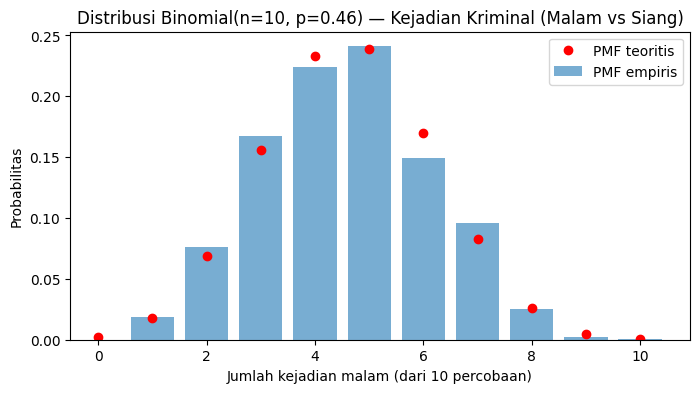

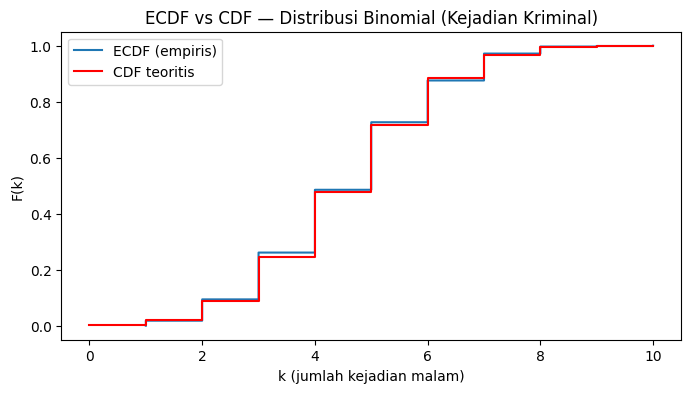

In [ ]:
# Konversi kolom ke datetime dan ambil jam (0–23)
data = pd.to_datetime(df["date_time_occ"], errors='coerce').dt.hour.dropna()

# Buat variabel biner: 1 = malam (18:00–05:59), 0 = siang (06:00–17:59)
def is_night(hour):
    return 1 if (hour >= 18 or hour < 6) else 0

binary_outcome = data.apply(is_night)

# Hitung parameter binomial empiris
n_trials = len(binary_outcome)
p_empiris = binary_outcome.mean()  # peluang kejadian di malam hari

print(f"Jumlah total kejadian: {n_trials}")
print(f"Peluang kriminal terjadi malam hari (p) ≈ {p_empiris:.2f}")

# Simulasi distribusi binomial teoritis
n = 10
p = p_empiris
binom_sample = np.random.binomial(n=n, p=p, size=1000)

plt.figure(figsize=(8,4))
values, counts = np.unique(binom_sample, return_counts=True)
plt.bar(values, counts / counts.sum(), alpha=0.6, label="PMF empiris")
k = np.arange(0, n+1)
plt.plot(k, stats.binom.pmf(k, n=n, p=p), 'ro', label="PMF teoritis")
plt.title(f"Distribusi Binomial(n={n}, p={p:.2f}) — Kejadian Kriminal (Malam vs Siang)")
plt.xlabel("Jumlah kejadian malam (dari 10 percobaan)")
plt.ylabel("Probabilitas")
plt.legend()
plt.show()

# ECDF vs CDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x_ecdf, y_ecdf = ecdf(binom_sample)
plt.figure(figsize=(8,4))
plt.step(x_ecdf, y_ecdf, where='post', label='ECDF (empiris)')
plt.step(k, stats.binom.cdf(k, n=n, p=p), 'r-', where='post', label='CDF teoritis')
plt.title("ECDF vs CDF — Distribusi Binomial (Kejadian Kriminal)")
plt.xlabel("k (jumlah kejadian malam)")
plt.ylabel("F(k)")
plt.legend()
plt.show()

In [ ]:
summary = pd.DataFrame({
    "Distribusi": ["Normal", "Uniform", "Eksponensial", "Binomial"],
    "Mean": [
        np.mean(data_std),
        np.mean(uniform_sample),
        np.mean(exp_sample),
        np.mean(binom_sample)
    ],
    "Std Dev": [
        np.std(data_std, ddof=1),
        np.std(uniform_sample, ddof=1),
        np.std(exp_sample, ddof=1),
        np.std(binom_sample, ddof=1)
    ],
    "Median": [
        np.median(data_std),
        np.median(uniform_sample),
        np.median(exp_sample),
        np.median(binom_sample)
    ]
})

print("\n=== RINGKASAN STATISTIK ===")
print(summary)


=== RINGKASAN STATISTIK ===
     Distribusi          Mean   Std Dev    Median
0        Normal -2.740511e-17  1.000023  0.045549
1       Uniform  5.781197e-01  0.280391  0.608696
2  Eksponensial  1.000000e+00  0.485006  1.052889
3      Binomial  4.567000e+00  1.584305  5.000000


### SUBSETTING

In [ ]:
subset = df[["area_name", "date_time_occ", "crm", "lat", "lon"]]
subset.head()


,area_name,year_occ,date_time_occ,crm,lat,lon
0,N Hollywood,2020.0,2020-11-07 08:45:00,THEFT OF IDENTITY,34.2124,-118.4092
1,N Hollywood,2020.0,2020-10-18 18:45:00,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34.1993,-118.4203
2,Van Nuys,2020.0,2020-10-30 12:40:00,THEFT OF IDENTITY,34.1847,-118.4509
3,Wilshire,2020.0,2020-12-24 13:10:00,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,34.0339,-118.3747
4,Pacific,2020.0,2020-09-29 18:30:00,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),33.9813,-118.4350


### GROUP BY & AGREGASI

Jumlah kasus per distrik:


,district,total_crimes
0,1.0,569
1,2.0,2354
2,3.0,1930
3,4.0,515
4,5.0,631


Data sensus:


,District,Council District,Pop2010,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Hispanic_pop,Other_pop,...,Marhh_chd,Marhh_no_c,Mhh_child,Fhh_child,Families,Avg_family_size,Housing_units,Vacant,Owner_occ,Renter_occ
0,1,1 - Gilbert Cedillo,245216.22,90857.00,7759.13,2991.73,43397.31,243.41,172971.55,88016.11,...,17472.38,12582.79,3923.03,8697.64,51391.85,2.68,85219.33,6204.52,15219.58,63795.23
1,10,10 - Herb J. Wesson Jr.,261297.85,68458.12,67087.07,2307.88,43148.34,308.11,126872.43,68188.27,...,17301.48,14284.08,3736.82,10927.24,57677.78,2.52,103637.46,7721.54,21764.30,74151.62
2,11,11 - Mike Bonin,250726.93,174020.70,13569.60,1214.43,30132.14,521.02,47243.32,18894.80,...,17305.63,24708.30,1874.20,4632.45,55447.15,2.07,123048.13,9183.91,50753.74,63110.49
3,12,12 - Mitchell Englander,258715.95,158939.64,11239.45,1193.56,46815.27,374.43,70827.63,27943.83,...,22493.92,26040.98,2137.22,5223.44,63921.59,2.72,90415.80,3683.73,60274.21,26457.86
4,13,13 - Mitch O'Farrell,247142.04,113391.23,9109.58,2320.07,43740.54,315.72,133038.67,66020.53,...,15096.73,14479.35,3100.50,7569.90,49457.04,2.48,102632.78,7725.95,13638.56,81268.27


Tingkat kejahatan per 100.000 penduduk per distrik:


,district,total_crimes,Council District,population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Hispanic_pop,...,Marhh_no_c,Mhh_child,Fhh_child,Families,Avg_family_size,Housing_units,Vacant,Owner_occ,Renter_occ,crime_rate_per_100k
10,11.0,2595,11 - Mike Bonin,250726.93,174020.70,13569.60,1214.43,30132.14,521.02,47243.32,...,24708.30,1874.20,4632.45,55447.15,2.07,123048.13,9183.91,50753.74,63110.49,1034.990537
1,2.0,2354,2 - Paul Krekorian,256691.84,158999.91,11463.05,1526.06,17554.92,330.51,115511.82,...,17423.32,3124.50,7409.10,55314.34,2.57,101135.77,6337.16,33612.25,61186.36,917.052914
6,7.0,2249,7 - Monica Rodriguez,256172.52,134061.58,10153.12,2312.73,15486.86,280.00,176836.41,...,14895.57,3410.85,7206.53,53839.42,3.04,71789.92,3918.56,41840.31,26031.06,877.923987
11,12.0,2165,12 - Mitchell Englander,258715.95,158939.64,11239.45,1193.56,46815.27,374.43,70827.63,...,26040.98,2137.22,5223.44,63921.59,2.72,90415.80,3683.73,60274.21,26457.86,836.825097
2,3.0,1930,3 - Bob Blumenfield,257183.29,155558.89,11669.04,1430.11,30404.92,324.33,95591.32,...,21069.27,2985.33,6800.72,60784.85,2.74,95650.77,6171.92,46723.56,42755.29,750.437558
8,9.0,1817,9 - Curren D. Price Jr.,248693.15,79473.84,39195.97,2512.90,6279.00,153.94,193825.58,...,5983.85,4149.33,10710.83,44947.25,3.39,62340.51,4601.34,15558.41,42180.76,730.619239
5,6.0,1587,6 - Nury Martinez,262111.74,123621.41,9843.61,2163.88,25023.59,321.65,183836.62,...,12699.56,4086.03,8670.31,54848.39,2.97,77003.13,4326.18,28518.00,44158.94,605.466966
7,8.0,1481,8 - Marqueece Harris-Dawson,245838.53,52123.80,102438.74,1766.78,3411.15,281.94,133317.31,...,9072.05,3761.14,13819.11,52173.37,2.69,78616.99,5597.67,28660.95,44358.36,602.427943
9,10.0,1569,10 - Herb J. Wesson Jr.,261297.85,68458.12,67087.07,2307.88,43148.34,308.11,126872.43,...,14284.08,3736.82,10927.24,57677.78,2.52,103637.46,7721.54,21764.30,74151.62,600.464183
14,15.0,1299,15 - Joe Buscaino,251283.55,108150.70,32853.03,2213.40,16305.70,1372.82,156217.43,...,13730.91,3716.83,11151.98,55863.03,2.55,81562.44,5136.14,31668.19,44758.11,516.945896


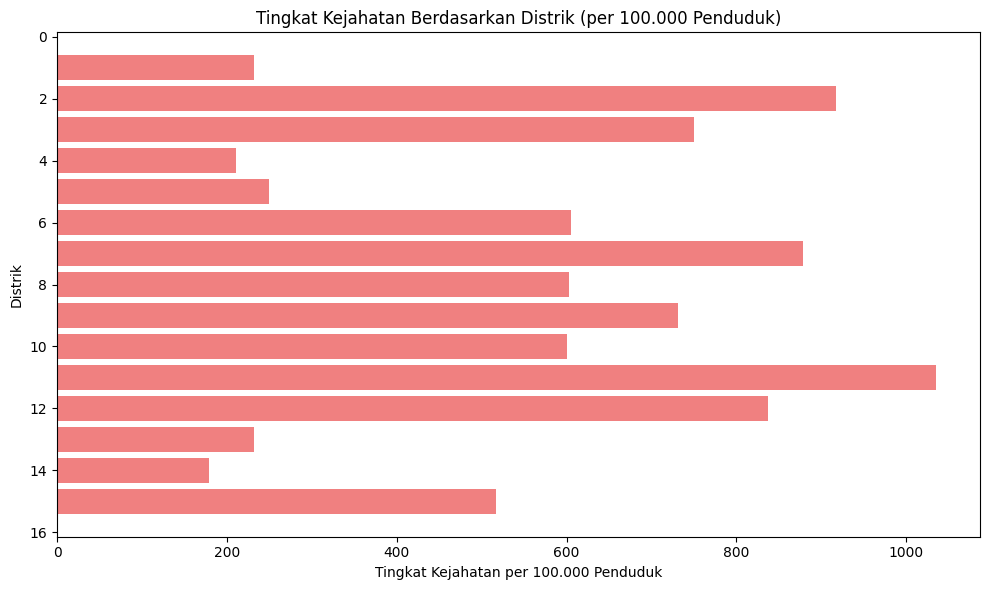

In [ ]:
# Hitung jumlah kasus per distrik
crime_by_district = df.groupby("district").size().reset_index(name="total_crimes")

print("Jumlah kasus per distrik:")
display(crime_by_district.head())

# Baca data sensus (pastikan path-nya sesuai)
census_df = pd.read_csv("/content/Census_Data_by_District.csv")

print("Data sensus:")
display(census_df.head())

# Pastikan nama kolomnya konsisten (misal 'district' dan 'population')
census_df = census_df.rename(columns={
    "District": "district",
    "Pop2010": "population"
})

# Gabungkan data kejahatan dan sensus
crime_census = pd.merge(crime_by_district, census_df, on="district", how="left")

# Hitung tingkat kejahatan per 100.000 penduduk
crime_census["crime_rate_per_100k"] = (crime_census["total_crimes"] / crime_census["population"]) * 100000

# Urutkan hasil
crime_census.sort_values(by="crime_rate_per_100k", ascending=False, inplace=True)

print("Tingkat kejahatan per 100.000 penduduk per distrik:")
display(crime_census)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(crime_census["district"], crime_census["crime_rate_per_100k"], color="lightcoral")
plt.xlabel("Tingkat Kejahatan per 100.000 Penduduk")
plt.ylabel("Distrik")
plt.title("Tingkat Kejahatan Berdasarkan Distrik (per 100.000 Penduduk)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Contoh hasil penggabungan data kejahatan vs polisi:


,area_name,year_occ,total_crimes,date,police_count,crimes_per_police
0,77th Street,2020.0,168,2022-01-25,350,0.480000
1,77th Street,2020.0,168,2022-04-06,311,0.540193
2,77th Street,2020.0,168,2022-04-25,340,0.494118
3,77th Street,2020.0,168,2022-05-03,340,0.494118
4,77th Street,2020.0,168,2022-08-22,339,0.495575


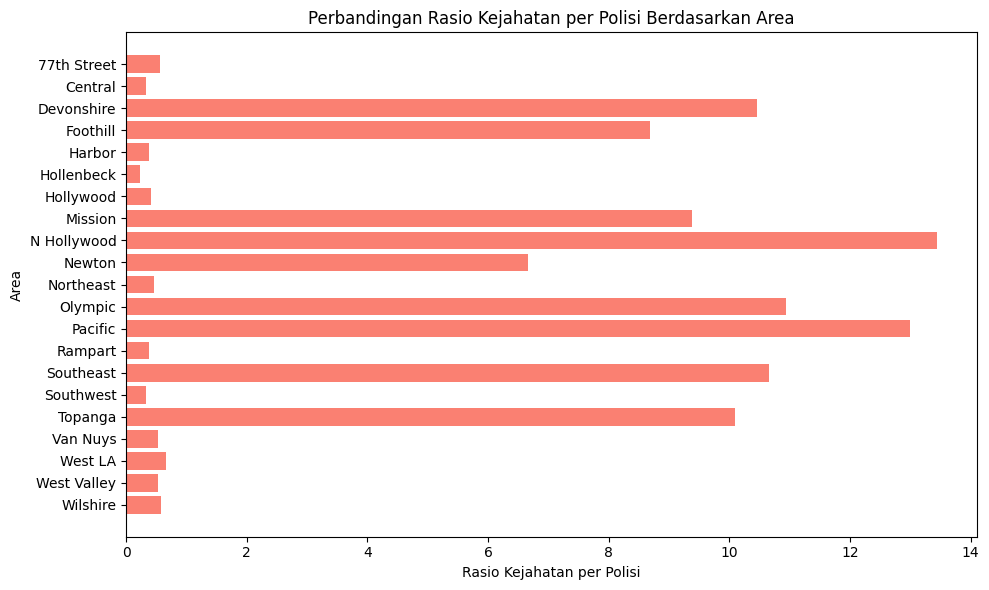

In [ ]:
# Baca kedua dataset
crime_df = df.copy()
police_df = pd.read_csv("/content/Police_Counts_by_Area.csv")

# Ubah nama kolom di data polisi biar konsisten
police_df = police_df.rename(columns={
    "AREA": "area_name",
    "count": "police_count",
    "SDATE": "date"
})

crime_df['year_occ'] = crime_df['date_time_occ'].dt.year
# Hitung total kejahatan per area & tanggal
crime_by_area_date = (
    crime_df
    .groupby(["area_name", "year_occ"])
    .size()
    .reset_index(name="total_crimes")
)

# Merge dengan data polisi
crime_police = pd.merge(
    crime_by_area_date,
    police_df,
    on="area_name",
    how="inner"
)

# Hitung rasio kejahatan per polisi
crime_police["crimes_per_police"] = (
    crime_police["total_crimes"] / crime_police["police_count"]
)

# Tampilkan hasil
print("Contoh hasil penggabungan data kejahatan vs polisi:")
display(crime_police.head())

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(crime_police["area_name"], crime_police["crimes_per_police"], color="salmon")
plt.xlabel("Rasio Kejahatan per Polisi")
plt.ylabel("Area")
plt.title("Perbandingan Rasio Kejahatan per Polisi Berdasarkan Area")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### TRANSFORM PER WILAYAH

In [ ]:
# Pastikan kolom waktu sudah datetime
df["date_time_occ"] = pd.to_datetime(df["date_time_occ"], errors="coerce")

# Ubah jadi timestamp (detik sejak epoch) untuk bisa dihitung z-score
df["time_numeric"] = df["date_time_occ"].astype("int64") / 1e9  # nanoseconds → seconds

# Hitung z-score waktu per area (group-wise transform)
df["zscore_time"] = df.groupby("area_name")["time_numeric"].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)

# Cek hasilnya
df[["area_name", "date_time_occ", "zscore_time"]].head()



,area_name,date_time_occ,zscore_time
0,N Hollywood,2020-11-07 08:45:00,1.249096
1,N Hollywood,2020-10-18 18:45:00,1.064555
2,Van Nuys,2020-10-30 12:40:00,0.364132
3,Wilshire,2020-12-24 13:10:00,0.860608
4,Pacific,2020-09-29 18:30:00,0.817595


### PIVOT TABEL

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,119,93,82,57,57,59,73,82,135,121,...,131,151,170,179,194,178,179,160,161,117
Tuesday,116,87,67,63,40,47,72,67,101,111,...,146,158,177,196,189,175,162,155,137,123
Wednesday,168,84,55,44,59,50,60,78,140,113,...,169,173,157,195,193,169,172,163,141,95
Thursday,115,78,71,66,51,69,68,73,121,101,...,169,185,172,200,191,178,154,158,136,131
Friday,121,84,65,54,47,50,66,62,111,108,...,179,213,185,214,215,172,185,141,165,154


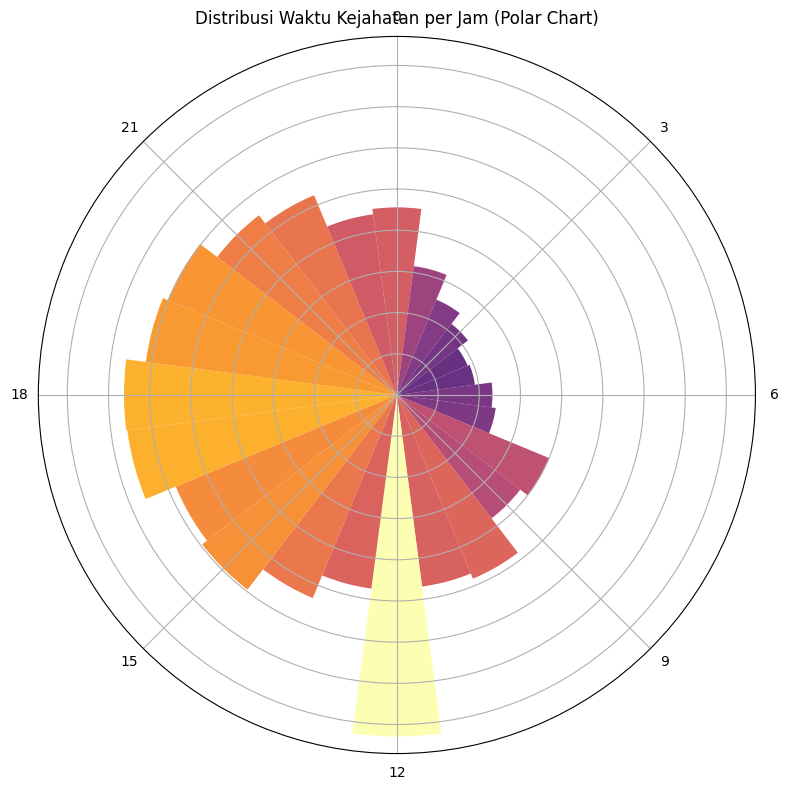

In [ ]:
# Pastikan kolom date_time_occ sudah dalam format datetime
crime_df["date_time_occ"] = pd.to_datetime(crime_df["date_time_occ"], errors="coerce")

# Buat kolom jam dan hari
crime_df["hour"] = crime_df["date_time_occ"].dt.hour
crime_df["day_of_week"] = crime_df["date_time_occ"].dt.day_name()

# Pivot Table Jam x Hari
pivot_time_day = crime_df.pivot_table(
    index="day_of_week",
    columns="hour",
    values="dr_no",   # pakai kolom unik ID kejadian
    aggfunc="count",
    fill_value=0
)

# Urutkan hari biar Senin–Minggu
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_time_day = pivot_time_day.reindex(day_order)

display(pivot_time_day.head())

# Hitung total per jam (untuk plot polar)
crime_by_hour = crime_df.groupby("hour").size().reset_index(name="count")

# Visualisasi Polar Chart
plt.figure(figsize=(8,8))

# Konversi jam ke radian (0–2π)
angles = np.deg2rad(crime_by_hour["hour"] * 15)  # 360° / 24 jam = 15° per jam

# Plot polar bar
ax = plt.subplot(111, polar=True)
bars = ax.bar(
    angles,
    crime_by_hour["count"],
    width=np.deg2rad(15),
    color=plt.cm.inferno(crime_by_hour["count"] / crime_by_hour["count"].max()),
    alpha=0.85
)

# Modeling
ax.set_theta_zero_location("N")   # 0 jam di atas
ax.set_theta_direction(-1)        # arah jarum jam
ax.set_xticks(np.deg2rad(np.arange(0, 360, 45)))
ax.set_xticklabels(["0", "3", "6", "9", "12", "15", "18", "21"])
ax.set_title("Distribusi Waktu Kejahatan per Jam (Polar Chart)", va="bottom")
ax.set_yticklabels([])

plt.tight_layout()
plt.show()


### CROSSTAB

In [ ]:
crosstab_tbl = pd.crosstab(subset["crm"], subset["area_name"])
crosstab_tbl.head()

area_name,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
crm,,,,,,,,,,,,,,,,,,,,,
ARSON,0,1,4,3,0,0,0,9,10,10,...,12,8,0,18,0,2,0,0,0,0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,0,0,0,4,0,0,0,3,4,3,...,0,3,0,4,0,4,0,0,0,0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1,1,57,81,1,1,2,110,104,141,...,129,115,2,299,0,87,0,0,0,1
ATTEMPTED ROBBERY,1,1,3,9,0,0,0,8,8,11,...,26,11,0,28,0,13,0,0,1,0
BATTERY - SIMPLE ASSAULT,4,3,125,147,2,3,1,145,199,183,...,221,208,1,234,0,159,0,3,1,2


## Visualisasi


### Diagram Baris


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997886 entries, 0 to 997885
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dr_no           997886 non-null  int64  
 1   date_rptd       997886 non-null  object 
 2   area            997886 non-null  int64  
 3   area_name       997886 non-null  object 
 4   rpt_dist_no     997886 non-null  int64  
 5   part_1-2        997886 non-null  int64  
 6   crm_cd          997886 non-null  int64  
 7   crm             997886 non-null  object 
 8   mocodes         847080 non-null  object 
 9   vict_age        997886 non-null  int64  
 10  vict_sex        997886 non-null  object 
 11  vict_descent    997886 non-null  object 
 12  premis_cd       997870 non-null  float64
 13  premis          997886 non-null  object 
 14  weapon_used_cd  324872 non-null  float64
 15  weapon          997886 non-null  object 
 16  status          997886 non-null  object 
 17  status.1  

In [ ]:
df['date_time_occ'].head(1)


,date_time_occ
0,2020-11-07 08:45:00


In [ ]:
df['date_time_occ'] = pd.to_datetime(df['date_time_occ'], errors='coerce')


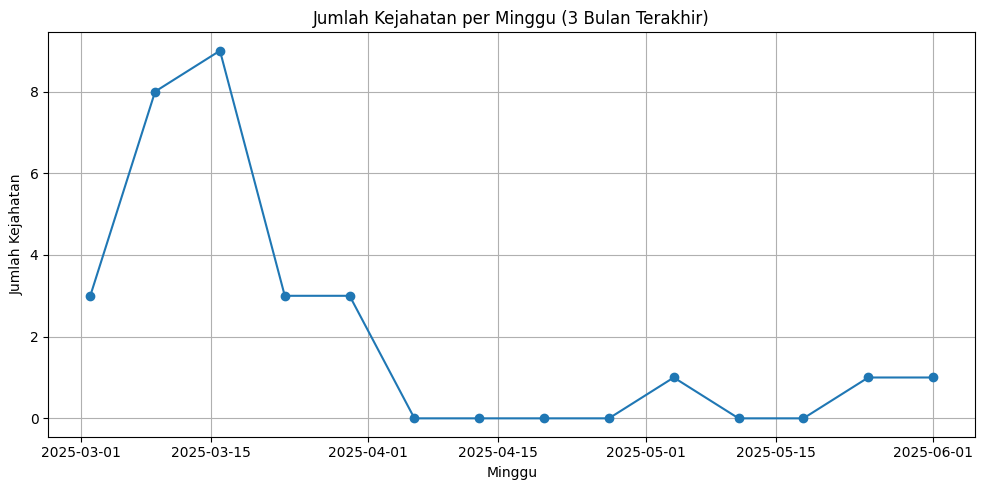

In [ ]:
latest_date = df['date_time_occ'].max()
three_months = latest_date - pd.DateOffset(months=3)

# Filter data 3 bulan terakhir
df_recent = df[df['date_time_occ'] >= three_months]

# Hitung jumlah kejadian per minggu
weekly = df_recent.resample('W', on='date_time_occ').size()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(weekly.index, weekly.values, marker='o')
plt.title('Jumlah Kejahatan per Minggu (3 Bulan Terakhir)')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Kejahatan')
plt.grid(True)
plt.tight_layout()
plt.show()

### Diagram Batang

/tmp/ipython-input-909140607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_area.values, y=top_area.index, palette="rocket")


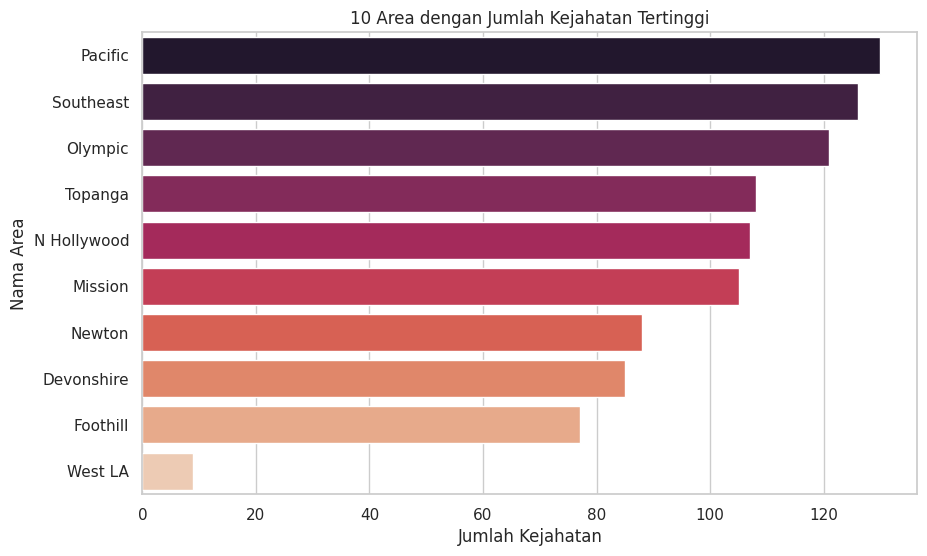

In [ ]:

top_area = df["area_name"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_area.values, y=top_area.index, palette="rocket")
plt.title("10 Area dengan Jumlah Kejahatan Tertinggi")
plt.xlabel("Jumlah Kejahatan")
plt.ylabel("Nama Area")
plt.show()

### Scatter Plot

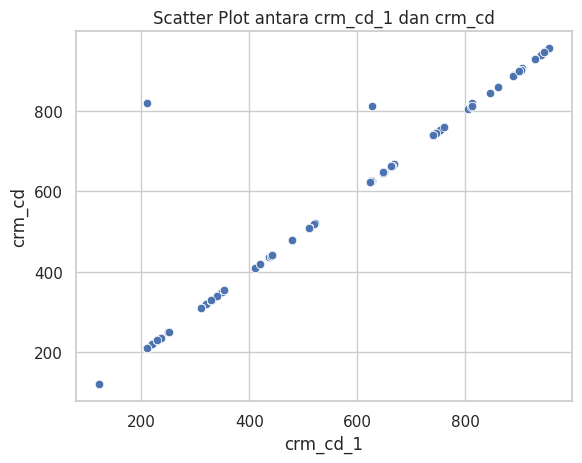

Korelasi antara crm_cd_1 dan crm_cd: 1.00


In [ ]:
sns.scatterplot(x='crm_cd_1', y='crm_cd', data=df)
plt.title('Scatter Plot antara crm_cd_1 dan crm_cd')
plt.xlabel('crm_cd_1')
plt.ylabel('crm_cd')
plt.show()

correlation = df['crm_cd_1'].corr(df['crm_cd'])
print(f'Korelasi antara crm_cd_1 dan crm_cd: {correlation:.2f}')

### Diagram Bubble

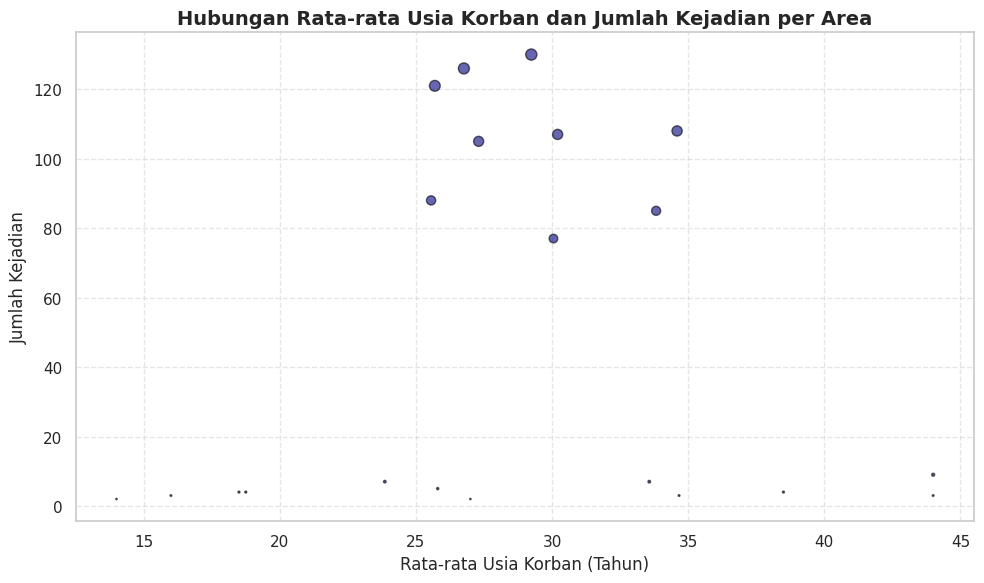

In [ ]:
area_stats = df.groupby("area_name").agg(
    avg_vict_age = ("vict_age", "mean"),
    total_individuals = ("vict_age", "count")
).reset_index()

area_stats.columns = ["Area", "Rata-rata Usia Korban", "Jumlah Kejadian"]

area_stats = area_stats.head(1000)

plt.figure(figsize=(10,6))
plt.scatter(
    area_stats["Rata-rata Usia Korban"],
    area_stats["Jumlah Kejadian"],
    s=area_stats["Jumlah Kejadian"]/2,
    alpha=0.6,
    color="navy",
    edgecolor="black"
)

plt.title("Hubungan Rata-rata Usia Korban dan Jumlah Kejadian per Area", fontsize=14, fontweight="bold")
plt.xlabel("Rata-rata Usia Korban (Tahun)", fontsize=12)
plt.ylabel("Jumlah Kejadian", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Area Plot

/tmp/ipython-input-621678872.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


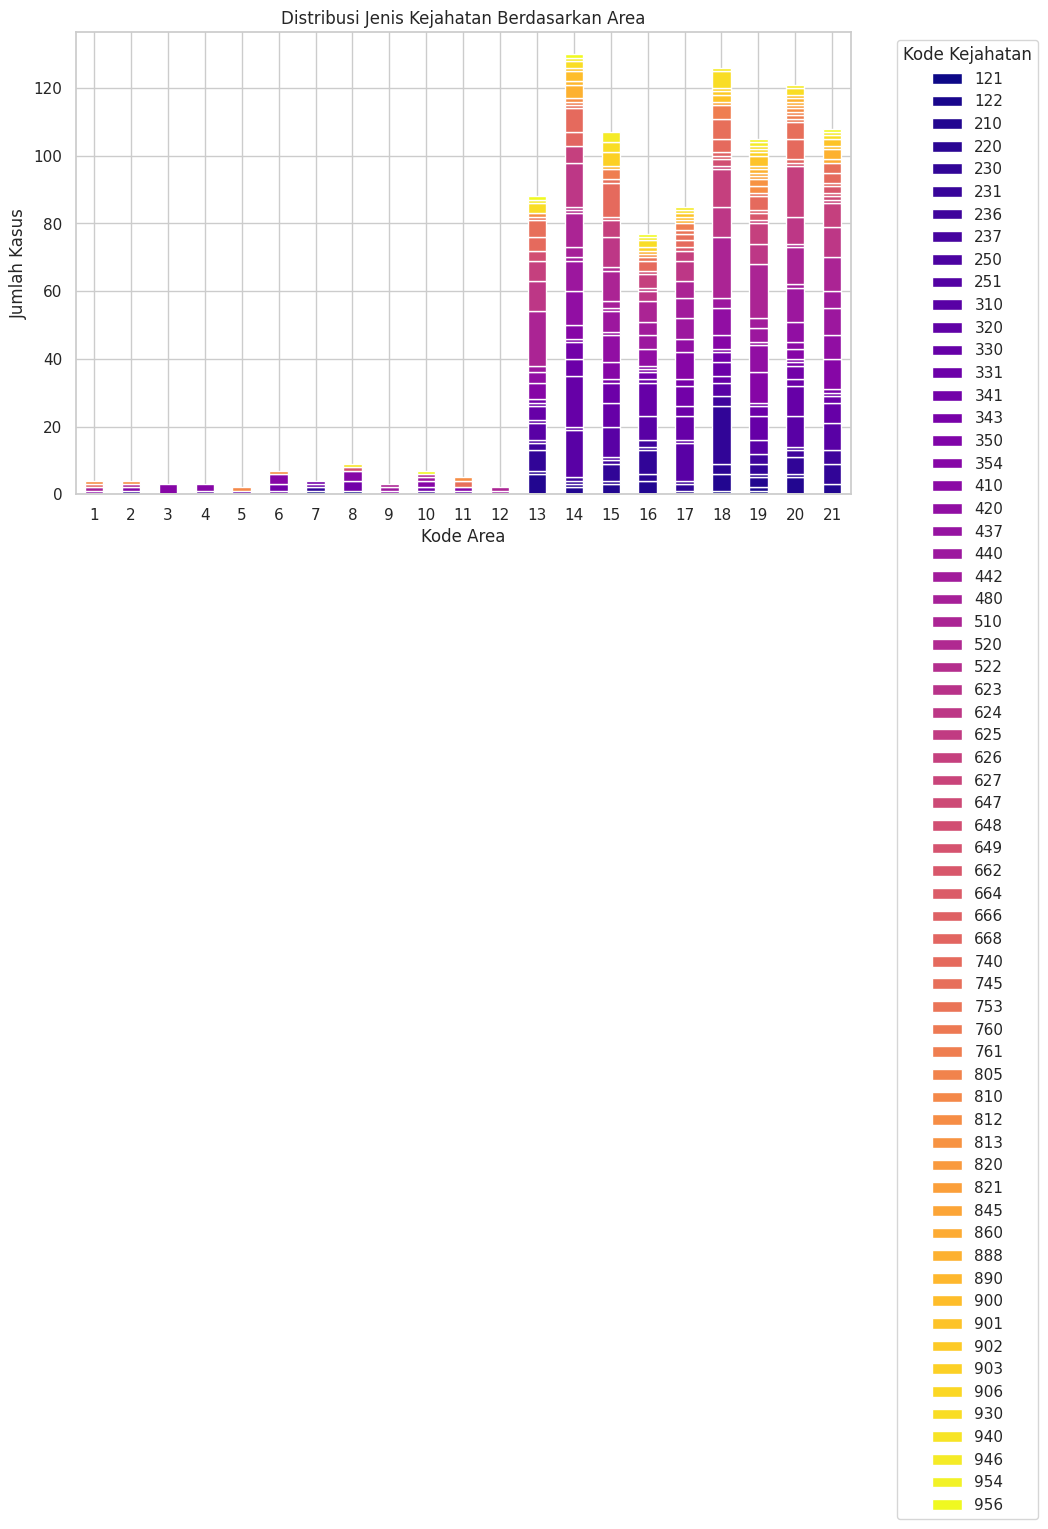

In [ ]:
cross_tab_area_crime = pd.crosstab(df['area_name'], df['crm'])

plt.figure(figsize=(10, 6))
ax = cross_tab_area_crime.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='plasma')

plt.title('Distribusi Jenis Kejahatan Berdasarkan Area')
plt.xlabel('Kode Area')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=0)
ax.legend(title='Kode Kejahatan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Diagram Lingkaran (pie)

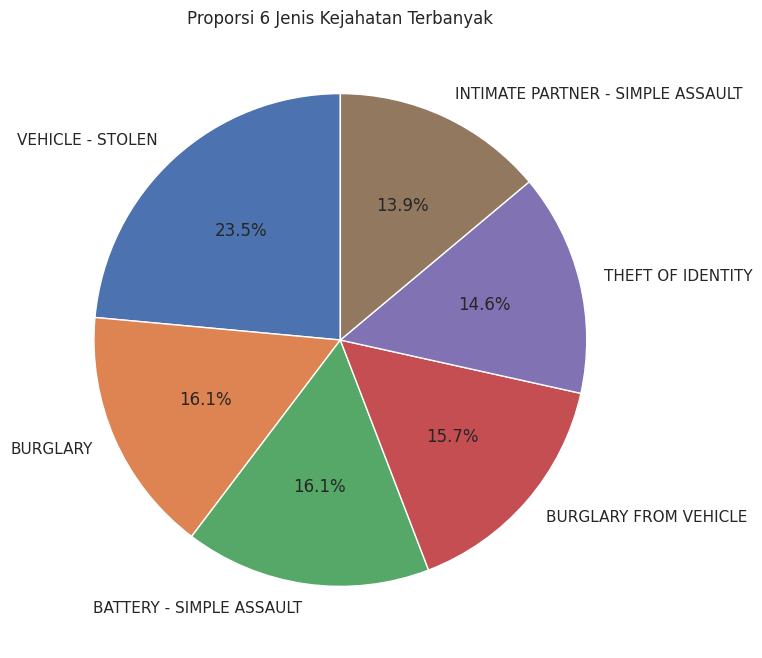

In [ ]:
crime_type = df["crm"].value_counts().head(6)
plt.figure(figsize=(8,8))
plt.pie(crime_type.values, labels=crime_type.index, autopct="%1.1f%%", startangle=90)
plt.title("Proporsi 6 Jenis Kejahatan Terbanyak")
plt.show()

## Diagram Tabel

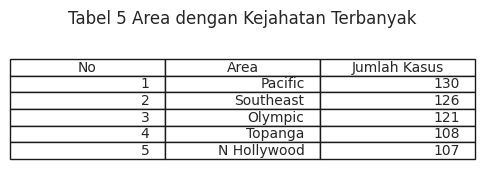

In [ ]:
top5 = top_area.head(5)
fig, ax = plt.subplots(figsize=(6,2))
ax.axis('tight')
ax.axis('off')
table_data = [[i+1, area, count] for i, (area, count) in enumerate(zip(top5.index, top5.values))]
table = ax.table(cellText=table_data, colLabels=["No", "Area", "Jumlah Kasus"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Tabel 5 Area dengan Kejahatan Terbanyak")
plt.show()

## Diagram Polar

In [ ]:
df["date_time_occ"] = pd.to_datetime(df["date_time_occ"], errors="coerce")
df["Hour_WIB"] = df["date_time_occ"].dt.hour
df[["date_time_occ", "Hour_WIB"]].head()


,date_time_occ,Hour_WIB
0,2020-11-07 08:45:00,8
1,2020-10-18 18:45:00,18
2,2020-10-30 12:40:00,12
3,2020-12-24 13:10:00,13
4,2020-09-29 18:30:00,18


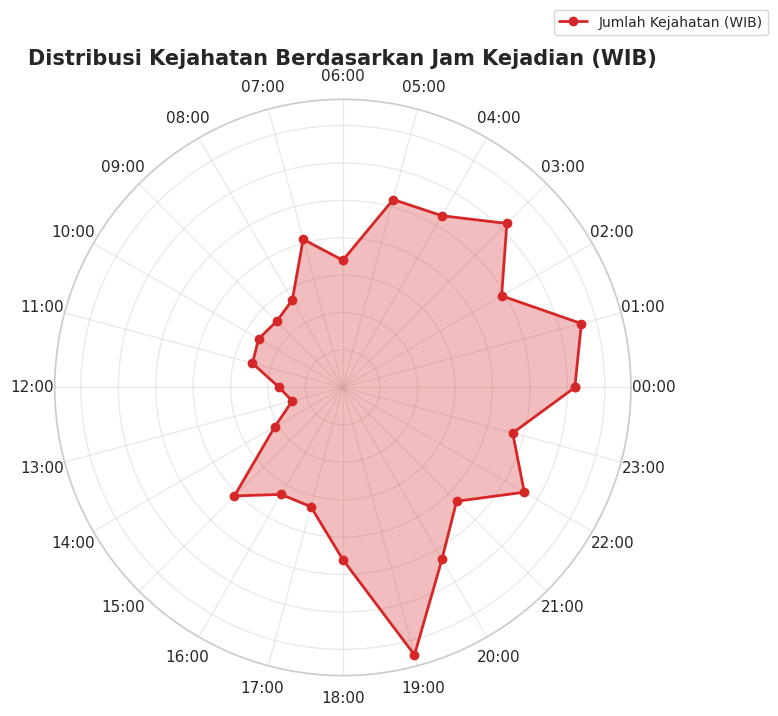

In [ ]:
df["date_time_occ"] = pd.to_datetime(df["date_time_occ"], errors="coerce")
df["Hour"] = df["date_time_occ"].dt.hour
df["Hour_WIB"] = (df["Hour"].astype(int) + 7) % 24

hourly = df["Hour_WIB"].value_counts().sort_index()

angles = np.linspace(0, 2 * np.pi, len(hourly), endpoint=False).tolist()
values = hourly.values.tolist()
angles += angles[:1]
values += values[:1]


sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, marker='o', linewidth=2, color='tab:red', label='Jumlah Kejahatan (WIB)')
ax.fill(angles, values, alpha=0.3, color='tab:red')

ax.set_title("Distribusi Kejahatan Berdasarkan Jam Kejadian (WIB)",
             fontsize=15, weight="bold", pad=25)

ax.set_xticks(np.linspace(0, 2 * np.pi, len(hourly), endpoint=False))
ax.set_xticklabels([f"{int(h):02d}:00" for h in hourly.index])

ax.set_yticklabels([])

ax.grid(alpha=0.4)
ax.legend(loc="lower right", bbox_to_anchor=(1.25, 1.1), fontsize=10)

plt.tight_layout()
plt.show()


## Histogram

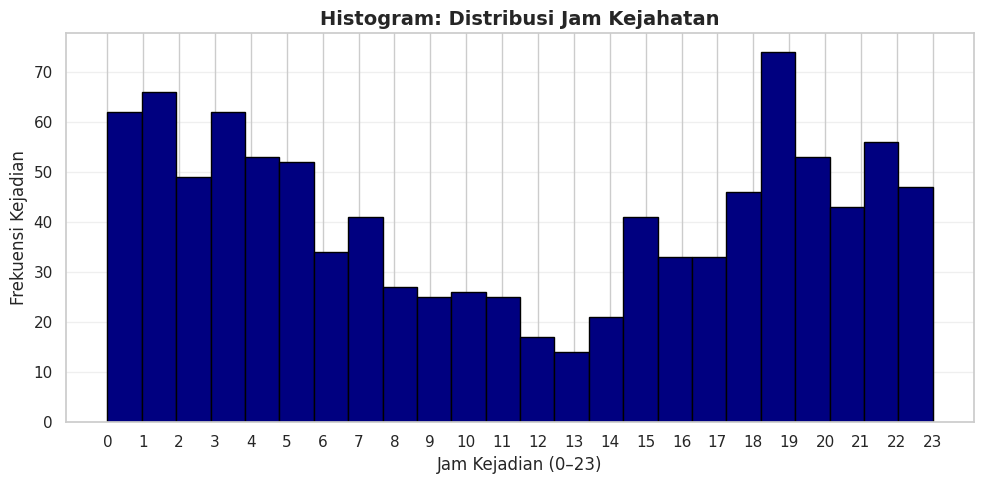

In [ ]:
df["date_time_occ"] = pd.to_datetime(df["date_time_occ"], errors="coerce")
df["Hour"] = df["date_time_occ"].dt.hour
df["Hour_WIB"] = (df["Hour"] + 7) % 24

plt.figure(figsize=(10,5))
plt.hist(df["Hour_WIB"], bins=24, color='navy', edgecolor='black')


plt.title("Histogram: Distribusi Jam Kejahatan", fontsize=14, fontweight="bold")
plt.xlabel("Jam Kejadian (0–23)", fontsize=12)
plt.ylabel("Frekuensi Kejadian", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Diagram Lollipop

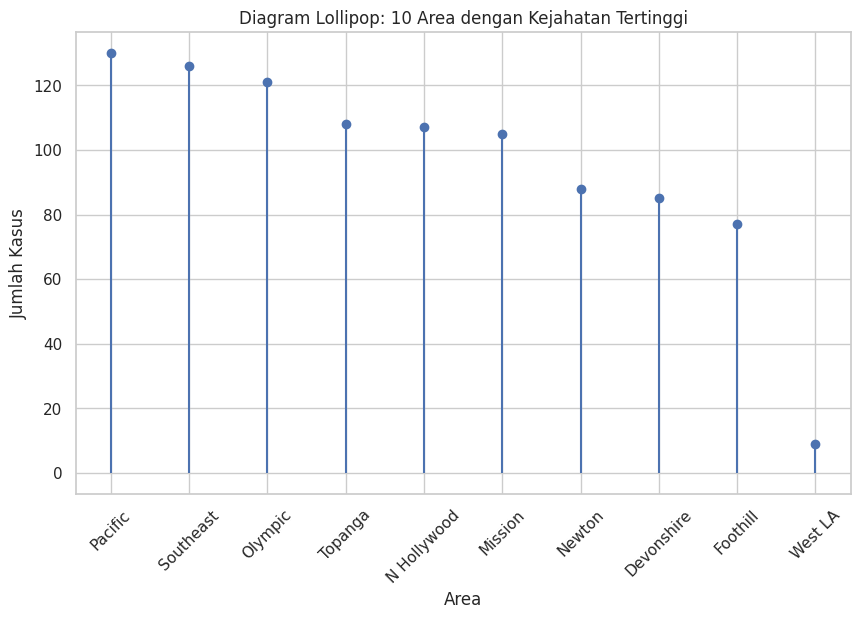

In [ ]:
plt.figure(figsize=(10,6))
plt.stem(top_area.index, top_area.values, basefmt=" ")
plt.title("Diagram Lollipop: 10 Area dengan Kejahatan Tertinggi")
plt.xlabel("Area")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.show()

## Diagram Terbaik Untuk Hotspot Dan Waktu Rawan

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'Devonshire'),
  Text(0, 1.5, 'Foothill'),
  Text(0, 2.5, 'Mission'),
  Text(0, 3.5, 'N Hollywood'),
  Text(0, 4.5, 'Newton'),
  Text(0, 5.5, 'Olympic'),
  Text(0, 6.5, 'Pacific'),
  Text(0, 7.5, 'Southeast'),
  Text(0, 8.5, 'Topanga'),
  Text(0, 9.5, 'West LA')])

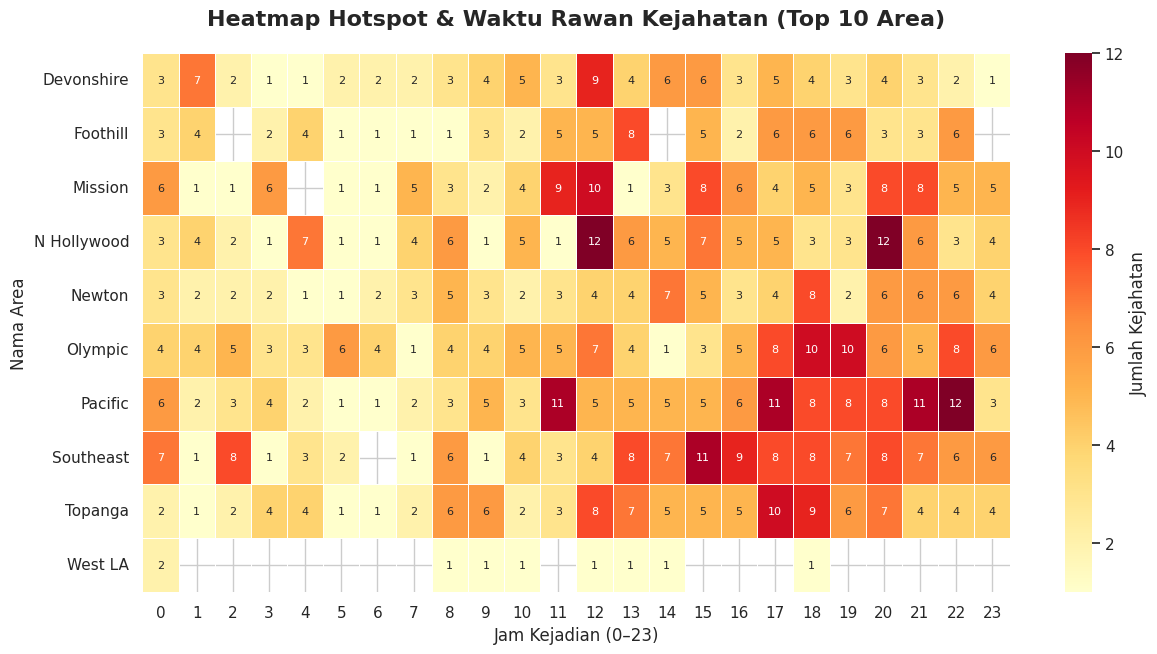

In [ ]:
crime_by_hour = df.groupby(["area_name", "Hour"]).size().reset_index(name="Jumlah Kejahatan")

top_areas = (
    crime_by_hour.groupby("area_name")["Jumlah Kejahatan"]
    .sum()
    .nlargest(10)
    .index
)
crime_top = crime_by_hour[crime_by_hour["area_name"].isin(top_areas)]

pivot_data = crime_top.pivot(index="area_name", columns="Hour", values="Jumlah Kejahatan")

plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

ax = sns.heatmap(
    pivot_data,
    cmap="YlOrRd",
    annot=True,
    fmt=".0f",
    annot_kws={"fontsize": 8},
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Jumlah Kejahatan"},
)

plt.title(
    "Heatmap Hotspot & Waktu Rawan Kejahatan (Top 10 Area)",
    fontsize=16, weight="bold", pad=20
)
plt.xlabel("Jam Kejadian (0–23)", fontsize=12)
plt.ylabel("Nama Area", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
